### Importing libs and reqired modules

In [42]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
import time
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score, roc_curve, auc,accuracy_score
from sklearn.preprocessing import label_binarize,LabelEncoder

# Importing our models

from src.models.naive_bayes_model import NaiveBayesRecommender
from src.models.knn_model import KNNRecommender
from src.models.logistic_regression_model import LogisticRegressionRecommender


# Setting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

### Loading Preprocessed Data

In [2]:
print("Loading processed data...")

train = pd.read_csv('../data/processed/processed_train.csv')
val = pd.read_csv('../data/processed/processed_val.csv')
test = pd.read_csv('../data/processed/processed_test.csv')

# Loaingd category mapping
with open('../data/processed/category_mapping.json', 'r') as f:
    category_mapping = json.load(f)

print(f"Training set: {len(train)} books")
print(f"Validation set: {len(val)} books")
print(f"Test set: {len(test)} books")
print(f"\nCategories: {list(category_mapping.keys())}")

Loading processed data...
Training set: 5005 books
Validation set: 715 books
Test set: 1430 books

Categories: ['Biography & Autobiography', 'Business & Economics', 'Computers', 'Education', 'Fiction', 'History', 'Juvenile Fiction', 'Language Arts & Disciplines', 'Literary Criticism', 'Philosophy', 'Science']


### Preparing Features and Labels

In [3]:
# Features (X) and labels (y)
X_train = train['combined_text']
y_train = train['category_encoded']

X_val = val['combined_text']
y_val = val['category_encoded']

X_test = test['combined_text']
y_test = test['category_encoded']

print("Features prepared!")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

Features prepared!
X_train shape: (5005,)
y_train shape: (5005,)


### Training Naive Bayes Model

In [4]:
print("="*60)
print("TRAINING NAIVE BAYES MODEL")
print("="*60)

start_time = time.time()

nb_model = NaiveBayesRecommender(model_type='multinomial')
nb_model.train(X_train, y_train)

nb_train_time = time.time() - start_time
print(f"\nTraining time: {nb_train_time:.2f} seconds")

# Evaluating on validation set
print("\n--- Validation Set Performance ---")
nb_val_metrics = nb_model.evaluate(X_val, y_val)

# Evaluating on test set
print("\n--- Test Set Performance ---")
nb_test_metrics = nb_model.evaluate(X_test, y_test)

# Saving model
nb_model.save_model()
print("\n✓ Naive Bayes model saved!")

TRAINING NAIVE BAYES MODEL
Training Naive Bayes model...
Training completed!

Training time: 0.40 seconds

--- Validation Set Performance ---

MULTINOMIAL Naive Bayes Evaluation:
Accuracy: 0.8671
Precision: 0.8704
Recall: 0.8671
F1-Score: 0.8647

--- Test Set Performance ---

MULTINOMIAL Naive Bayes Evaluation:
Accuracy: 0.8867
Precision: 0.8880
Recall: 0.8867
F1-Score: 0.8844
Model saved to /Users/nirdeshsubedi/Documents/Courseworks/book-rec-ai/ai-book-recommendation/trained_models/naive_bayes.pkl

✓ Naive Bayes model saved!


### Training Logistics Regression Model

In [5]:
print("\n" + "="*60)
print("TRAINING LOGISTIC REGRESSION MODEL")
print("="*60)

start_time = time.time()

lr_model = LogisticRegressionRecommender(max_iter=1000)
lr_model.train(X_train, y_train)

lr_train_time = time.time() - start_time
print(f"\nTraining time: {lr_train_time:.2f} seconds")

# Evaluating on validation set
print("\n--- Validation Set Performance ---")
lr_val_metrics = lr_model.evaluate(X_val, y_val)

# Evaluating on test set
print("\n--- Test Set Performance ---")
lr_test_metrics = lr_model.evaluate(X_test, y_test)

# Saving model
lr_model.save_model()
print("\n✓ Logistic Regression model saved!")



TRAINING LOGISTIC REGRESSION MODEL
Training Logistic Regression model...


/opt/anaconda3/envs/ai-book-rec/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training completed!

Training time: 2.53 seconds

--- Validation Set Performance ---

Logistic Regression Evaluation:
Accuracy: 0.9007
Precision: 0.9055
Recall: 0.9007
F1-Score: 0.8993

--- Test Set Performance ---

Logistic Regression Evaluation:
Accuracy: 0.9147
Precision: 0.9163
Recall: 0.9147
F1-Score: 0.9130
Model saved to /Users/nirdeshsubedi/Documents/Courseworks/book-rec-ai/ai-book-recommendation/trained_models/logistic_regression.pkl

✓ Logistic Regression model saved!


### Training KNN Model

In [6]:
print("\n" + "="*60)
print("TRAINING KNN MODEL")
print("="*60)

start_time = time.time()

knn_model = KNNRecommender(n_neighbors=15)
knn_model.train(X_train, y_train)

knn_train_time = time.time() - start_time
print(f"\nTraining time: {knn_train_time:.2f} seconds")

# Evaluating on validation set
print("\n--- Validation Set Performance ---")
knn_val_metrics = knn_model.evaluate(X_val, y_val)

# Evaluating on test set
print("\n--- Test Set Performance ---")
knn_test_metrics = knn_model.evaluate(X_test, y_test)

# Saving model
knn_model.save_model()
print("\n✓ KNN model saved!")


TRAINING KNN MODEL
Training KNN model with 15 neighbors...
Training completed!

Training time: 0.42 seconds

--- Validation Set Performance ---

KNN Evaluation (k=15):
Accuracy: 0.7678
Precision: 0.7651
Recall: 0.7678
F1-Score: 0.7620

--- Test Set Performance ---

KNN Evaluation (k=15):
Accuracy: 0.7643
Precision: 0.7634
Recall: 0.7643
F1-Score: 0.7603
Model saved to /Users/nirdeshsubedi/Documents/Courseworks/book-rec-ai/ai-book-recommendation/trained_models/knn.pkl

✓ KNN model saved!


### Comparing all models

In [7]:
print("\n" + "="*60)
print("MODEL COMPARISON - TEST SET RESULTS")
print("="*60)

comparison_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'KNN', 'Logistic Regression'],
    'Accuracy': [
        nb_test_metrics['accuracy'],
        knn_test_metrics['accuracy'],
        lr_test_metrics['accuracy']
    ],
    'Precision': [
        nb_test_metrics['precision'],
        knn_test_metrics['precision'],
        lr_test_metrics['precision']
    ],
    'Recall': [
        nb_test_metrics['recall'],
        knn_test_metrics['recall'],
        lr_test_metrics['recall']
    ],
    'F1-Score': [
        nb_test_metrics['f1_score'],
        knn_test_metrics['f1_score'],
        lr_test_metrics['f1_score']
    ],
    'Training Time (s)': [
        nb_train_time,
        knn_train_time,
        lr_train_time
    ]
})

print("\n" + comparison_df.to_string(index=False))



# Find best model
best_accuracy_idx = comparison_df['Accuracy'].idxmax()
best_model = comparison_df.loc[best_accuracy_idx, 'Model']
best_accuracy = comparison_df.loc[best_accuracy_idx, 'Accuracy']

print(f"\nBest Model: {best_model} with {best_accuracy:.4f} accuracy")

# Saving comparison
comparison_df.to_csv('../trained_models/model_comparison.csv', index=False)
print("\nComparison saved to trained_models/model_comparison.csv")



MODEL COMPARISON - TEST SET RESULTS

              Model  Accuracy  Precision   Recall  F1-Score  Training Time (s)
        Naive Bayes  0.886713   0.888030 0.886713  0.884448           0.396338
                KNN  0.764336   0.763441 0.764336  0.760341           0.423434
Logistic Regression  0.914685   0.916289 0.914685  0.912975           2.532916

Best Model: Logistic Regression with 0.9147 accuracy

Comparison saved to trained_models/model_comparison.csv


In [37]:
import json

# Load mapping file
with open("../data/processed/category_mapping.json", "r") as f:
    cat_map = json.load(f)

# cat_map looks like: {"Fiction": 0, "Romance": 1, ...}
# → reverse to: {0: "Fiction", 1: "Romance", ...}
id_to_class = {v: k for k, v in cat_map.items()}

# Final ordered class names list
class_names = [id_to_class[i] for i in sorted(id_to_class.keys())]

print("Detected Classes:", class_names)


Detected Classes: ['Biography & Autobiography', 'Business & Economics', 'Computers', 'Education', 'Fiction', 'History', 'Juvenile Fiction', 'Language Arts & Disciplines', 'Literary Criticism', 'Philosophy', 'Science']


In [44]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    print("\n" + "="*70)
    print(f"            EVALUATION REPORT – {model_name}")
    print("="*70)


    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)



    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)

    train_acc = accuracy_score(y_train, train_pred)
    val_acc = accuracy_score(y_val, val_pred)

    print("\n--- Overfitting / Underfitting Diagnosis ---")
    print(f"Training Accuracy:   {train_acc:.4f}")
    print(f"Validation Accuracy: {val_acc:.4f}")

    if train_acc - val_acc > 0.10:
        print(" Model is likely OVERFITTING.")
    elif val_acc - train_acc > 0.10:
        print("Model is likely UNDERFITTING.")
    else:
        print("Model is well-balanced (no major over/underfit).")


    
    print("\n--- Confusion Matrix ---")
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm,
                annot=True,
                fmt='d',
                cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title(f"{model_name} – Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

   
    print("\n--- Classification Report ---")
    print(classification_report(
        y_test,
        y_pred,
        target_names=class_names
    ))

    
    print("\n--- ROC–AUC Score (macro, OVR) ---")

    y_test_bin = label_binarize(y_test, classes=np.arange(len(class_names)))
    roc_auc = roc_auc_score(y_test_bin, y_prob, multi_class="ovr", average="macro")

    print(f"ROC–AUC (macro): {roc_auc:.4f}")

    
    print("\n--- ROC Curves (first 3 classes) ---")

    plt.figure(figsize=(8,6))
    for i in range(min(3, len(class_names))):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f"{class_names[i]}")

    plt.plot([0,1], [0,1], "k--")
    plt.title(f"{model_name} – ROC Curves")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    print("\nDONE.\n")


### Naive Bayes Evaluation 


            EVALUATION REPORT – Naive Bayes

--- Overfitting / Underfitting Diagnosis ---
Training Accuracy:   0.9303
Validation Accuracy: 0.8671
Model is well-balanced (no major over/underfit).

--- Confusion Matrix ---


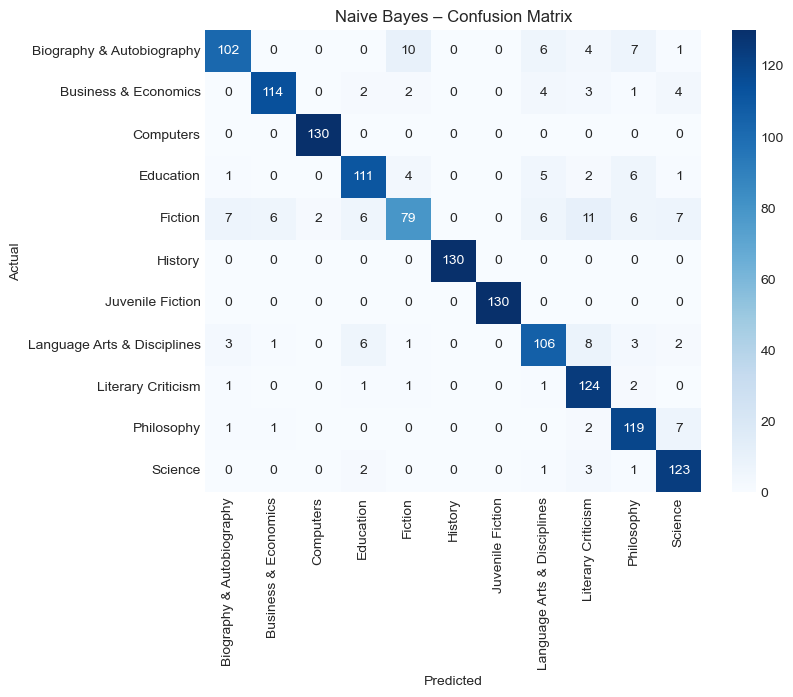


--- Classification Report ---
                             precision    recall  f1-score   support

  Biography & Autobiography       0.89      0.78      0.83       130
       Business & Economics       0.93      0.88      0.90       130
                  Computers       0.98      1.00      0.99       130
                  Education       0.87      0.85      0.86       130
                    Fiction       0.81      0.61      0.70       130
                    History       1.00      1.00      1.00       130
           Juvenile Fiction       1.00      1.00      1.00       130
Language Arts & Disciplines       0.82      0.82      0.82       130
         Literary Criticism       0.79      0.95      0.86       130
                 Philosophy       0.82      0.92      0.87       130
                    Science       0.85      0.95      0.89       130

                   accuracy                           0.89      1430
                  macro avg       0.89      0.89      0.88      1430
 

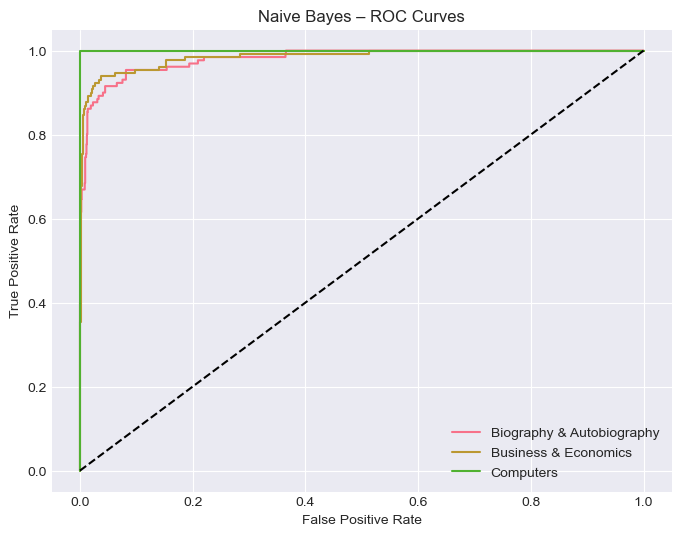


DONE.



In [45]:
evaluate_model(nb_model, X_test, y_test, model_name="Naive Bayes")


### Logistic Regression Evaluation


            EVALUATION REPORT – Logistic Regression

--- Confusion Matrix ---


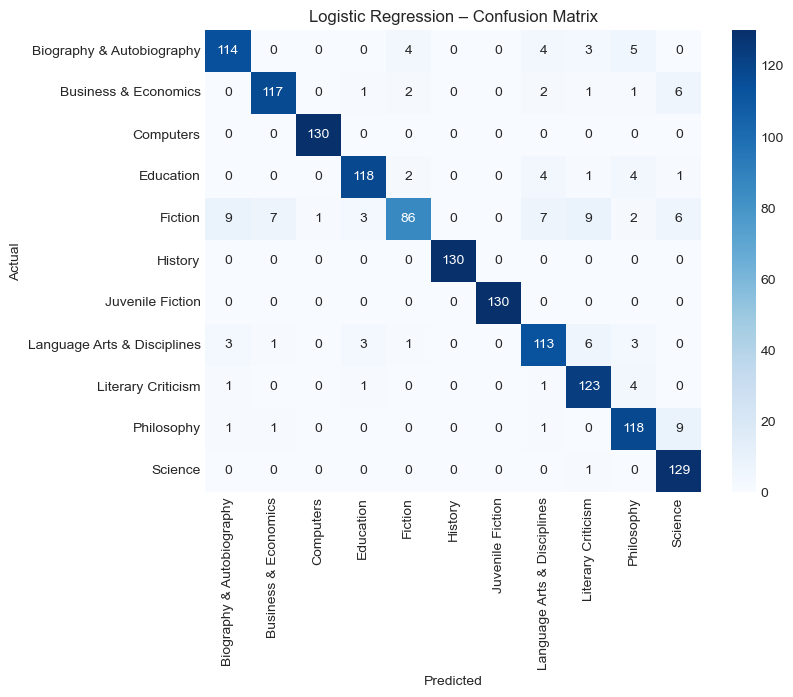


--- Classification Report ---
                             precision    recall  f1-score   support

  Biography & Autobiography       0.89      0.88      0.88       130
       Business & Economics       0.93      0.90      0.91       130
                  Computers       0.99      1.00      1.00       130
                  Education       0.94      0.91      0.92       130
                    Fiction       0.91      0.66      0.76       130
                    History       1.00      1.00      1.00       130
           Juvenile Fiction       1.00      1.00      1.00       130
Language Arts & Disciplines       0.86      0.87      0.86       130
         Literary Criticism       0.85      0.95      0.90       130
                 Philosophy       0.86      0.91      0.88       130
                    Science       0.85      0.99      0.92       130

                   accuracy                           0.91      1430
                  macro avg       0.92      0.91      0.91      1430
 

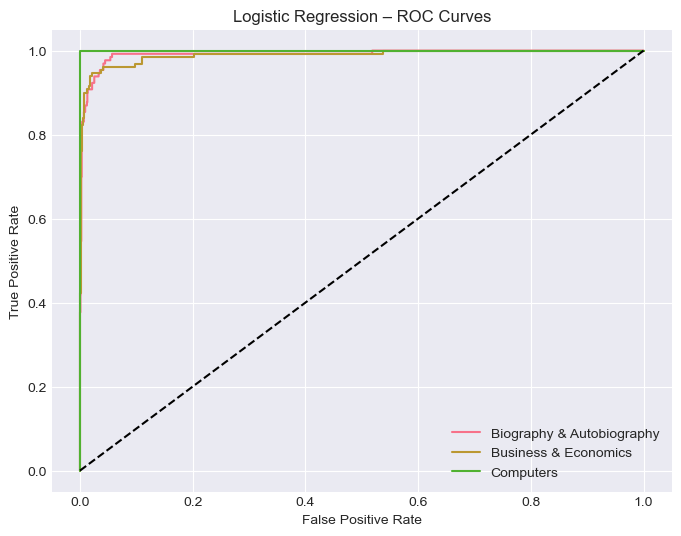


DONE.



In [40]:
evaluate_model(lr_model, X_test, y_test, model_name="Logistic Regression")


### KNN Evaluation


            EVALUATION REPORT – KNN

--- Confusion Matrix ---


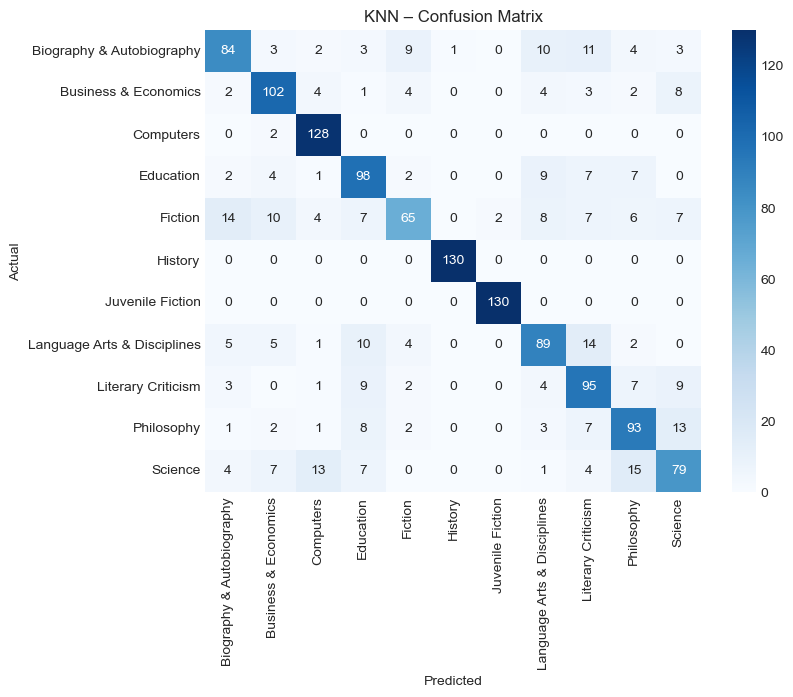


--- Classification Report ---
                             precision    recall  f1-score   support

  Biography & Autobiography       0.73      0.65      0.69       130
       Business & Economics       0.76      0.78      0.77       130
                  Computers       0.83      0.98      0.90       130
                  Education       0.69      0.75      0.72       130
                    Fiction       0.74      0.50      0.60       130
                    History       0.99      1.00      1.00       130
           Juvenile Fiction       0.98      1.00      0.99       130
Language Arts & Disciplines       0.70      0.68      0.69       130
         Literary Criticism       0.64      0.73      0.68       130
                 Philosophy       0.68      0.72      0.70       130
                    Science       0.66      0.61      0.63       130

                   accuracy                           0.76      1430
                  macro avg       0.76      0.76      0.76      1430
 

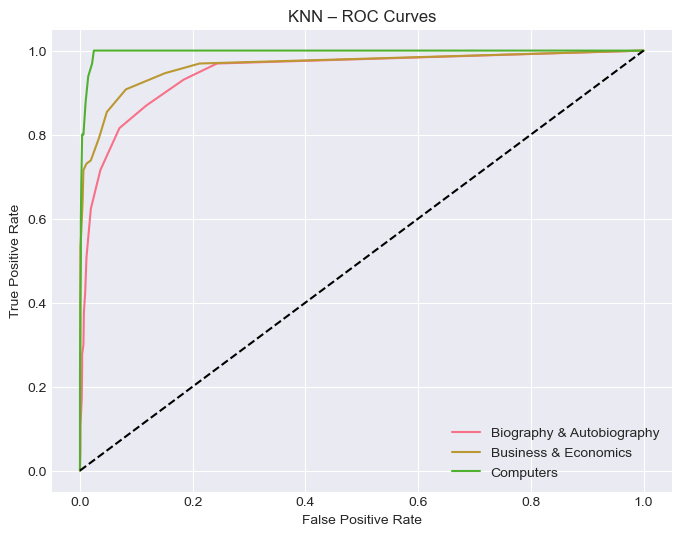


DONE.



In [41]:
evaluate_model(knn_model, X_test, y_test, model_name="KNN")
